In [1]:
import pathlib

import numpy as np
import pandas as pd
from sklearn import metrics, model_selection, tree

# Load the data

In [2]:
DATA_DIR = pathlib.Path("../input/sdaia-kaust-ai-august-school-2022")

# training data contains both features and labels
train_df = pd.read_csv(DATA_DIR / "train.csv")

# split training data into features and target
train_features = train_df.drop("labels", axis=1)
train_target = train_df.loc[:, "labels"]

# testing data contains only features
test_features = pd.read_csv(DATA_DIR / "test.csv")

In [3]:
train_features.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1014,p1015,p1016,p1017,p1018,p1019,p1020,p1021,p1022,p1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_target.head()

0    19
1    23
2     9
3    27
4    23
Name: labels, dtype: int64

In [5]:
test_features.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p1014,p1015,p1016,p1017,p1018,p1019,p1020,p1021,p1022,p1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create an estimator

In [6]:
#change seed
from sklearn.ensemble import RandomForestClassifier

_seed = 5390399
_estimator_hyperpararmeters = {
    "random_state": np.random.RandomState(_seed),
}
estimatorForest = RandomForestClassifier(**_estimator_hyperpararmeters)
#estimator = tree.DecisionTreeClassifier(**_estimator_hyperpararmeters)

In [7]:
estimatorForest.fit(train_features, train_target)

RandomForestClassifier(random_state=RandomState(MT19937) at 0x7F08E5186AF0)

In [8]:
scores = model_selection.cross_val_score(
    estimatorForest,
    train_features,
    train_target,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

In [9]:
print(f"Estimated validation error: {scores.mean()}")

Estimated validation error: 0.6386160714285714


# Make predictions

In [10]:
# assess the error on the training data
train_predictions = estimatorForest.predict(train_features)
_report = metrics.classification_report(
    train_target,
    train_predictions
)
print(_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       480
           2       1.00      1.00      1.00       480
           3       1.00      1.00      1.00       480
           4       1.00      1.00      1.00       480
           5       1.00      1.00      1.00       480
           6       1.00      1.00      1.00       480
           7       1.00      1.00      1.00       480
           8       1.00      1.00      1.00       480
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       480
          11       1.00      1.00      1.00       480
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       480
          14       1.00      1.00      1.00       480
          15       1.00      1.00      1.00       480
          16       1.00      1.00      1.00       480
          17       1.00      1.00      1.00       480
          18       1.00    

In [11]:
# predict using the test data
test_predictions = estimatorForest.predict(test_features)
test_predictions

array([19,  9,  7, ..., 10,  4,  2])

# Generate a submission file

In [12]:
_ = (pd.DataFrame
       .from_dict({"Id": test_features.index, "Category": test_predictions})
       .to_csv("submission.csv", index=False))

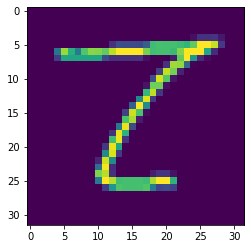

In [13]:
import matplotlib.pyplot as plt
plt.imshow(test_features.values[0].reshape(32,32).transpose(1,0))

In [14]:
import torch
torch.manual_seed(1)
torch.randn(2,2)

tensor([[0.6614, 0.2669],
        [0.0617, 0.6213]])

In [15]:
torch.randn(2,2)

tensor([[-0.4519, -0.1661],
        [-1.5228,  0.3817]])